In [6]:
import matplotlib.pyplot as plt
import json
import os
import cv2
import time
import numpy as np

import pickle
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import umap
import scanpy as sc
import anndata as ad
from initial_analysis import ExpressionAnalyzer

In [7]:
%load_ext autoreload
%autoreload 2

In [9]:
EA = ExpressionAnalyzer()
EA.run(segment="nuclei", profile=None)

Calculating expression: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 36/36 [00:00<00:00, 164.72it/s]


In [10]:
EA.expression_data

CD11b-PE   CD16-PE  CD2-FITC   CD26-PE  CD29-FITC  \
Field of View     Index                                                      
ALS01 - 21297     1      0.850394  0.976378  0.026247  0.000000   0.002625   
                  2      0.034031  0.688482  0.007853  0.013089   0.000000   
                  3      0.016611  0.627907  0.019934  0.000000   0.000000   
                  4      0.000000  0.634518  0.152284  0.000000   0.043147   
                  5      0.000000  0.000000  0.035422  0.000000   0.000000   
...                           ...       ...       ...       ...        ...   
Healthy05 - 21334 3536   0.008949  0.031320  0.093960  0.000000   0.006711   
                  3537   0.167901  0.059259  0.140741  0.000000   0.106173   
                  3538   0.093890  0.053651  0.049180  0.000000   0.001490   
                  3539   0.000000  0.000000  0.100121  0.000000   0.002413   
                  3540   0.418741  0.445095  0.111274  0.001464   0.016105   

                           CD3-PE  CD36-FITC   CD38-PE    CD4-PE   CD45-PE  \
Field of View     Index                                                      
ALS01 - 21297     1      0.013123   0.039370  0.000000  0.000000  0.002625   
                  2      0.036649   0.000000  0.013089  0.000000  0.028796   
                  3      0.000000   0.000000  0.292359  0.000000  0.598007   
                  4      0.000000   0.149746  0.505076  0.000000  0.017766   
                  5      0.000000   0.000000  0.000000  0.000000  0.000000   
...                           ...        ...       ...       ...       ...   
Healthy05 - 21334 3536   0.011186   0.000000  0.020134  0.093960  0.035794   
                  3537   0.000000   0.000000  0.096296  0.000000  0.000000   
                  3538   0.558867   0.008942  0.010432  0.000000  0.004471   
                  3539   0.000000   0.000000  0.109771  0.073583  0.032569   
                  3540   0.238653   0.007321  0.079063  0.256223  0.071742   

                         ...   CD56-PE   CD57-PE    CD7-PE    CD8-PE  \
Field of View     Index  ...                                           
ALS01 - 21297     1      ...  0.034121  0.000000  0.000000  0.000000   
                  2      ...  0.060209  0.000000  0.180628  0.002618   
                  3      ...  0.461794  0.737542  0.581395  0.003322   
                  4      ...  0.170051  0.000000  0.649746  0.000000   
                  5      ...  0.008174  0.000000  0.000000  0.000000   
...                      ...       ...       ...       ...       ...   
Healthy05 - 21334 3536   ...  0.000000  0.000000  0.004474  0.000000   
                  3537   ...  0.049383  0.000000  0.000000  0.000000   
                  3538   ...  0.004471  0.000000  0.001490  0.724292   
                  3539   ...  0.001206  0.000000  0.000000  0.000000   
                  3540   ...  0.024890  0.000000  0.014641  0.002928   

                         HLA-DQ-FITC  HLA-DR-PE  NeuN-AF488       PBS  \
Field of View     Index                                                 
ALS01 - 21297     1         0.020997   0.000000    0.099738  0.000000   
                  2         0.005236   0.000000    0.002618  0.000000   
                  3         0.136213   0.000000    0.039867  0.000000   
                  4         0.010152   0.000000    0.010152  0.000000   
                  5         0.024523   0.000000    0.027248  0.000000   
...                              ...        ...         ...       ...   
Healthy05 - 21334 3536      0.026846   0.000000    0.000000  0.000000   
                  3537      0.066667   0.000000    0.000000  0.000000   
                  3538      0.023845   0.000000    0.000000  0.000000   
                  3539      0.039807   0.000000    0.000000  0.000000   
                  3540      0.051245   0.001464    0.005857  0.011713   

                            Sample    Group  
Field of View     Index                      
ALS01 - 21297   

In [11]:
EA.expression_data = EA.expression_data.sort_index()

y_cols = ["Group", "Sample"]
ys = EA.expression_data[y_cols]
Xs = EA.expression_data.drop(labels=y_cols, axis=1)

Xs_normalized = StandardScaler().fit_transform(Xs)

#df_normalized = pd.DataFrame(data=Xs, index=Xs.index, columns=Xs.columns)

#binary_df = (df_normalized > 0)
#binary_df = binary_df.astype(int)
#binary_df.to_pickle(f"./binary_expression_{segment}_1.pkl")  

In [6]:
#expression_data.iloc[:,:-3] = Xs_normalized

In [12]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.9.3 anndata==0.9.1 umap==0.5.3 numpy==1.24.3 scipy==1.10.1 pandas==1.4.2 scikit-learn==1.2.2 statsmodels==0.13.5 python-igraph==0.10.5 pynndescent==0.5.10


In [13]:
expression_data = EA.expression_data
sample_names = expression_data.index.get_level_values('Field of View')
cell_counts = expression_data.index.get_level_values('Index')

# Convert the DataFrame to AnnData
adata = ad.AnnData(expression_data.drop(columns=['Sample', 'Group']).values)

# Set the sample names and cell counts as observations and variables in the AnnData object
adata.obs['sample_name'] = sample_names
adata.obs['cell_count'] = cell_counts
adata.obs['sample'] = expression_data["Sample"].values
adata.obs['group'] = expression_data["Group"].values


# Optionally, you may want to transpose the data if the antigens are in columns and cells are in rows
#adata = adata.transpose()

# Perform any necessary preprocessing steps
# For example, you can normalize the data using scanpy's pp.normalize_total function
sc.pp.normalize_total(adata)

sc.pp.neighbors(adata)


# Run PCA on the data
#sc.pp.pca(adata)

# Perform Leiden clustering
sc.tl.leiden(adata)

# Access the cluster labels
cluster_labels = adata.obs['leiden']
sc.tl.umap(adata)
# You can also access the cluster assignments as an array using
# cluster_labels = adata.obs.leiden.values

# Print the cluster labels
print(cluster_labels)

normalizing counts per cell
    finished (0:00:00)
computing neighbors
    using data matrix X directly


_normalization.py (197): Some cells have zero counts


    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:18)
running Leiden clustering
    finished: found 37 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:03:23)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:01:18)
0         12
1         13
2          5
3          1
4         20
          ..
189590    17
189591    12
189592     4
189593    16
189594    12
Name: leiden, Length: 189595, dtype: category
Categories (37, object): ['0', '1', '2', '3', ..., '33', '34', '35', '36']


In [14]:
adata.obs['sample'] = expression_data["Sample"].values
adata.obs['group'] = expression_data["Group"].values

scatterplots.py (392): No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


<Figure size 800x640 with 0 Axes>

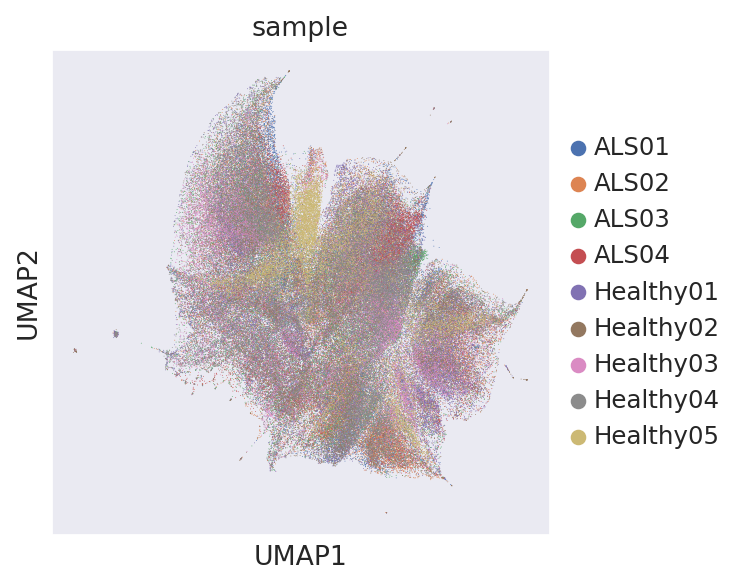

In [15]:
sns.set_theme()
plt.figure(figsize=(10,8))
sc.pl.umap(adata, color='sample')

scatterplots.py (392): No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


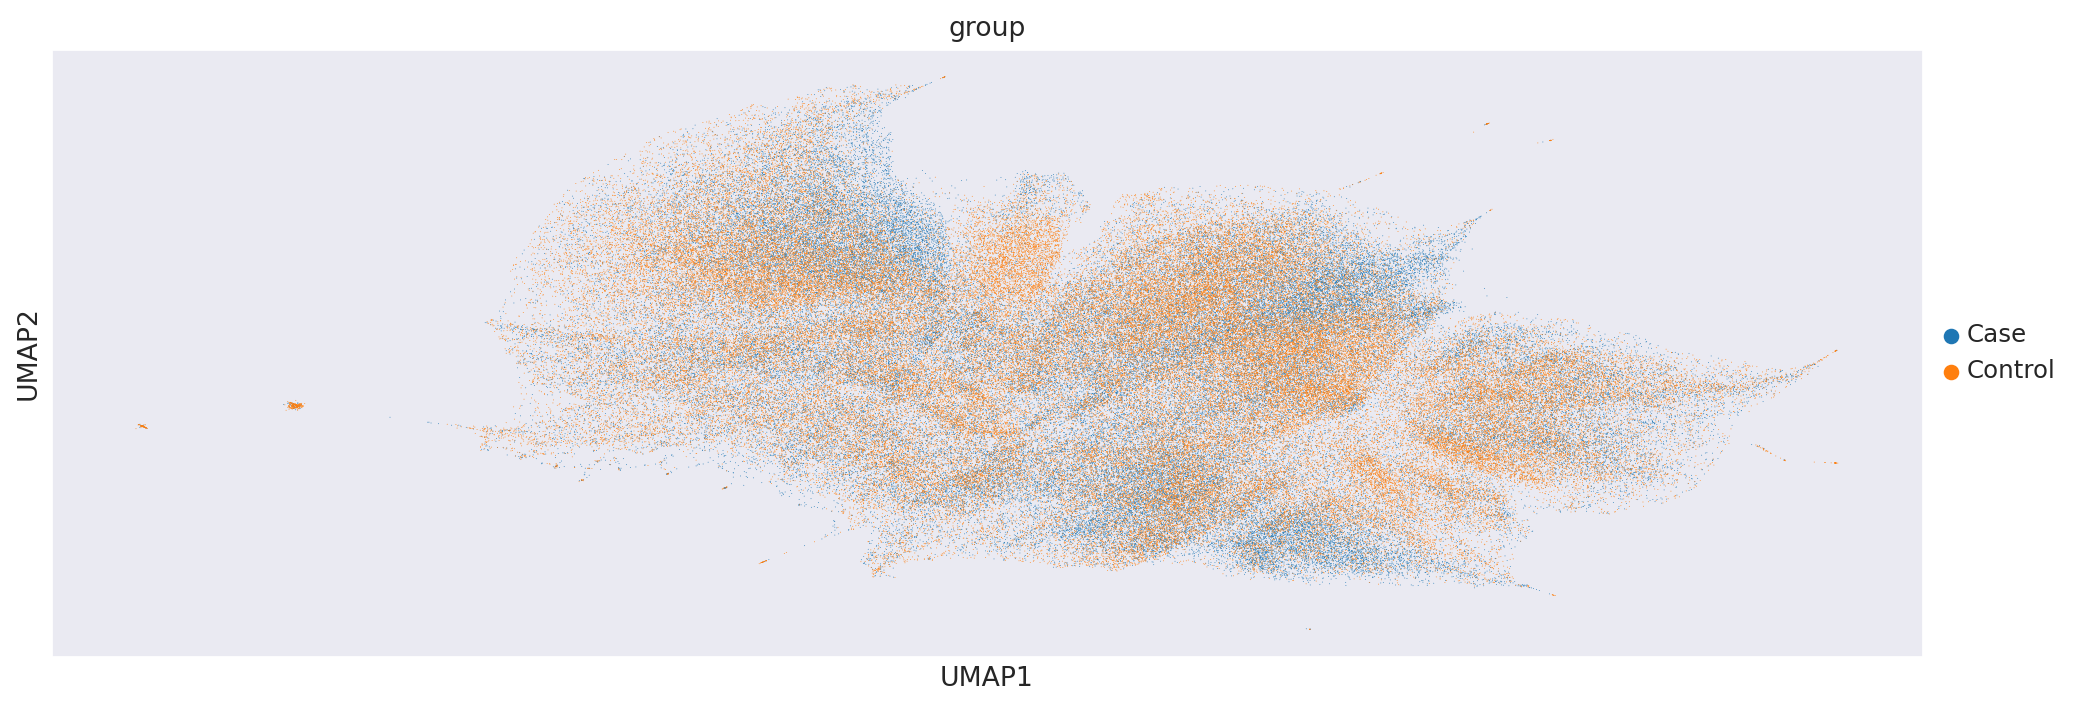

In [37]:
sc.pl.umap(adata, color='group')

scatterplots.py (392): No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


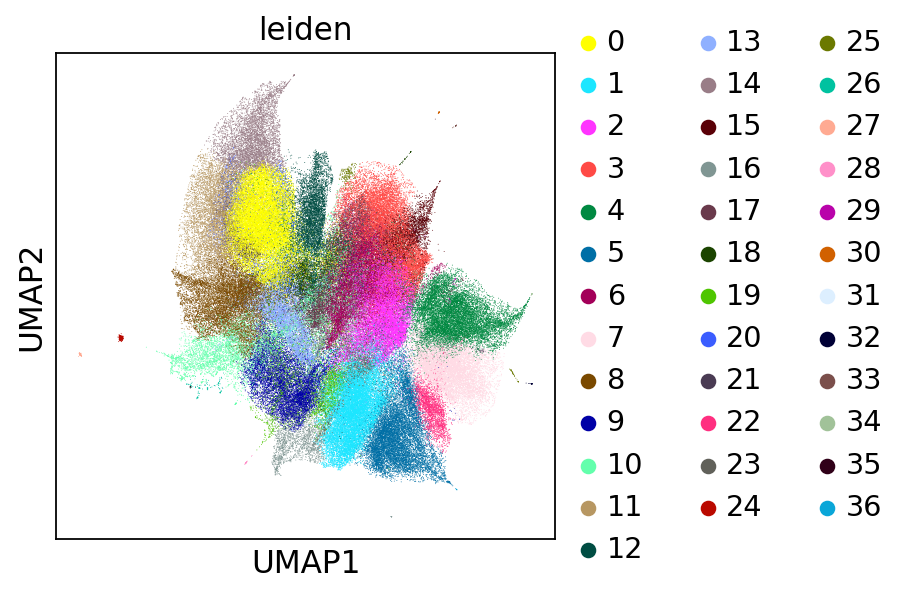

In [20]:
sc.pl.umap(adata, color='leiden')

In [21]:
leiden = adata.obs["leiden"].values.to_numpy().astype(int)
sample = adata.obs["sample"].values.to_numpy().astype(str)
df = pd.DataFrame({"leiden": leiden, "sample": sample})

leiden_labels = np.unique(leiden)
samples = np.unique(sample)

conf = np.zeros((len(leiden_labels), len(samples)))
for i, l in enumerate(leiden_labels):
    for j, s in enumerate(samples):             
        conf[i,j] = len(np.where(sample[np.where(leiden == l)] == s)[0])

In [28]:
conf_df = pd.DataFrame(conf, index=leiden_labels, columns=samples).T
conf_df["sum"] = conf_df.sum(axis=1)

In [29]:
rel_conf = conf_df.iloc[:,:-1].div(conf_df["sum"], axis=0)

<Axes: >

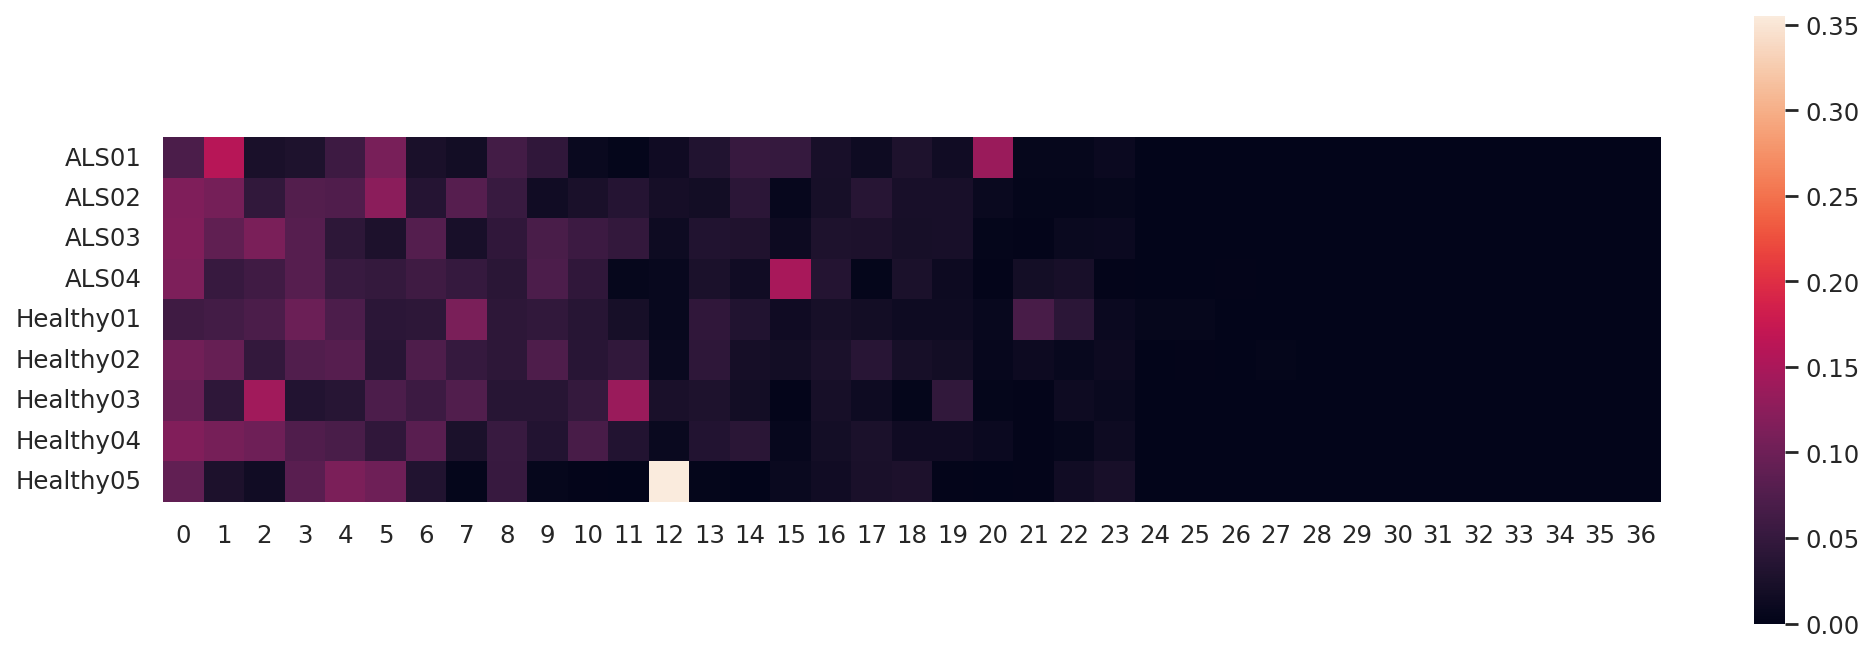

In [30]:
sns.set(rc={'figure.figsize':(15, 5)})
sns.heatmap(rel_conf,square=True)

In [31]:
expression_data["leiden"] = leiden

In [32]:
binary_cluster_centers = np.zeros((len(leiden_labels), 19))
for i in range(len(leiden_labels)):
    (expression_data[expression_data["leiden"] == i].drop(["Sample", "Group"], axis=1).mean(axis=0) > 0).astype(int)
    binary_cluster_centers[i] = (expression_data[expression_data["leiden"] == i].drop(["Sample", "Group"], axis=1).mean(axis=0) > 0).astype(int)[:-1]

In [33]:
binary_cluster_center_df = pd.DataFrame(binary_cluster_centers.T, index = expression_data.columns[:-3])

In [34]:
binary_cluster_center_df["Patent profile"] = [0, 1] + [np.nan] * 13 + [0] + [np.nan] * 3
binary_cluster_center_df["Publication profile"] = [0, 1] + [np.nan] * 8 + [1] + [np.nan] * 8

<Axes: >

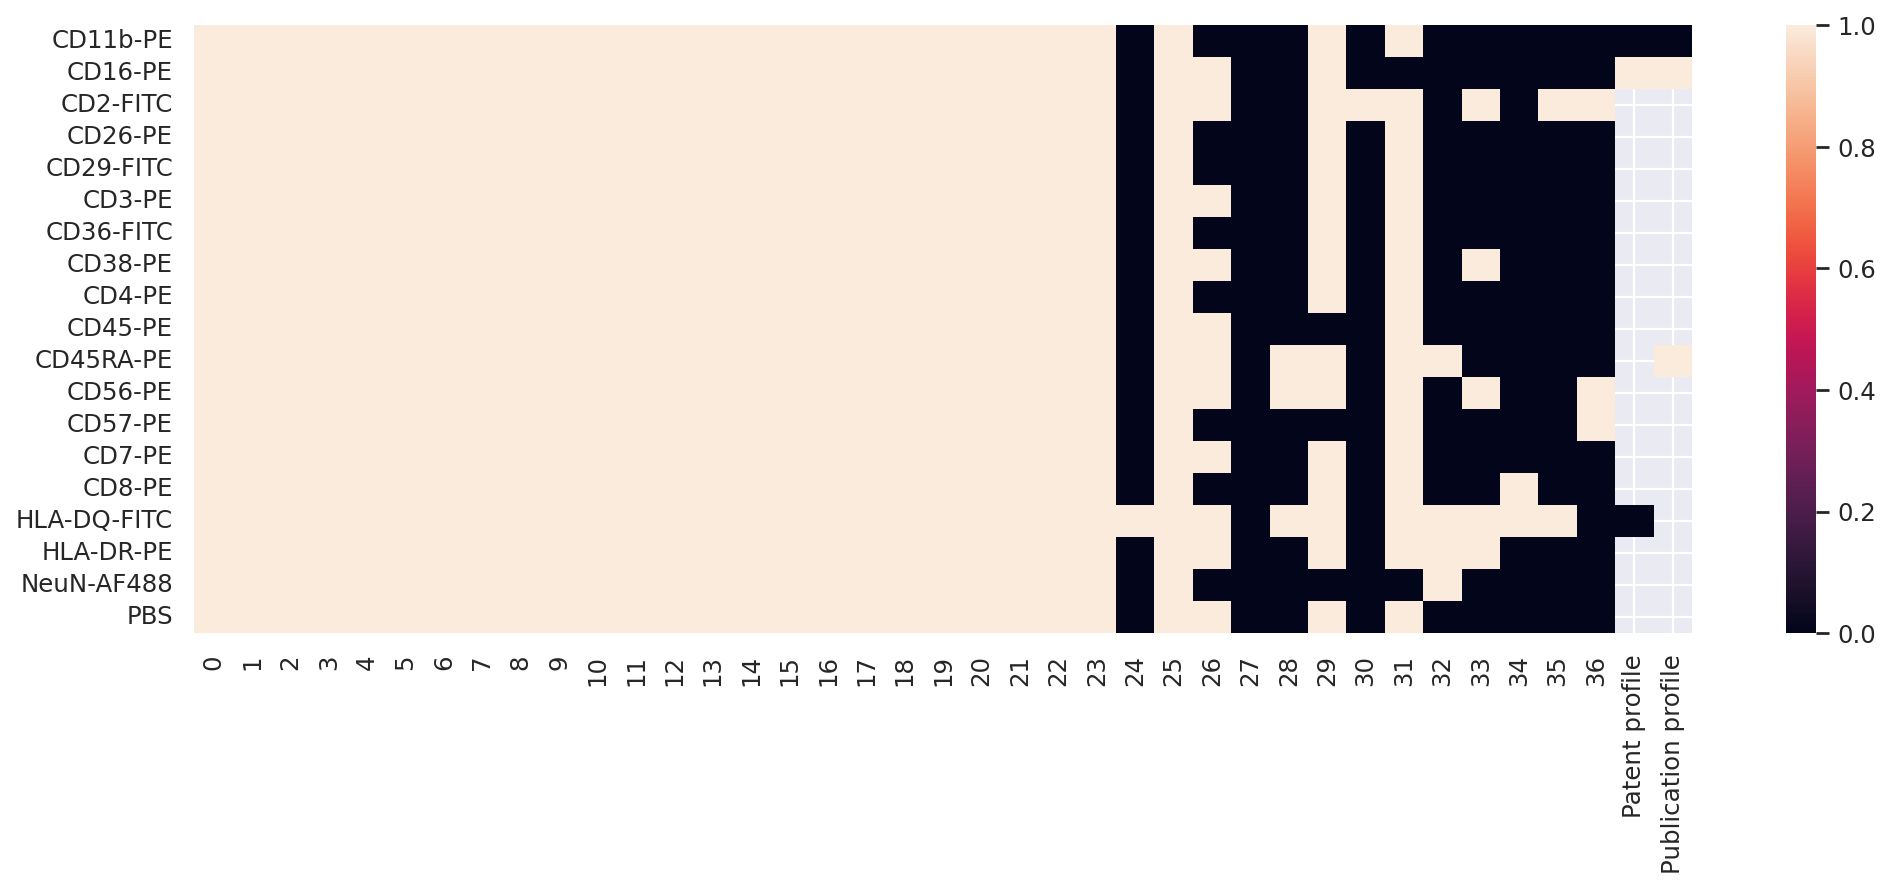

In [35]:
sns.set_theme()
sns.heatmap(binary_cluster_center_df)

In [ ]:
binary_cluster_center[1]

In [ ]:
cluster_center_1 = (expression_data[expression_data["leiden"] == 1].drop(["Sample", "Group"], axis=1).mean(axis=0) > 0).astype(int) 
cluster_center_1

In [ ]:
cluster_center_12 = (expression_data[expression_data["leiden"] == 12].drop(["Sample", "Group"], axis=1).mean(axis=0) > 0).astype(int)

In [ ]:
cluster_center_11 = (expression_data[expression_data["leiden"] == 11].drop(["Sample", "Group"], axis=1).mean(axis=0) > 0).astype(int)

In [ ]:
sns.histplot(data=df, x="leiden", y="sample", kde=True, bins=(30, 30))
plt.show()

In [ ]:
sample

In [ ]:
adata["leiden"]

In [ ]:
df = pd.DataFrame({'Sample': expression_data["Sample"].values, 'Leiden Cluster': cluster_labels.values})
cluster_counts = df.groupby(['Sample', 'Leiden Cluster']).size().unstack(fill_value=0)

# Set up the figure and axes for the bar plot
fig, ax = plt.subplots(figsize=(8, 6))

# Use Seaborn's barplot function to create the stacked bar plot
sns.barplot(data=cluster_counts, ax=ax, hue="Sample")

# Customize the plot
ax.set_xlabel('Sample')
ax.set_ylabel('Number of Cells')
ax.set_title('Cell Clusters by Sample Name')

# Rotate the x-axis labels if needed
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [ ]:
df

In [ ]:
adata

In [ ]:
adata

In [ ]:
def conf_heatmap(res_df, props1, props2):
    hm = np.zeros((len(np.unique(res_df[props1])), len(np.unique(res_df[props2]))))

    for i, p1 in enumerate(np.unique(res_df[props1])):
        for j, p2 in enumerate(np.unique(res_df[props2])):
            sub_df = res_df[res_df[props1]==p1]
            sub_df = sub_df[sub_df[props2]==p2]
            hm[i,j] = len(sub_df)

    sns.heatmap(hm, annot=True, xticklabels=np.unique(res_df[props2]), yticklabels=np.unique(res_df[props1]), vmin=0, vmax=len(res_df))
    plt.tight_layout()
    plt.show()

In [ ]:
conf_heatmap(res_df, props1="2-Means Label", props2="Group")

In [ ]:
conf_heatmap(res_df, props1="8-Means Label", props2="Group")

In [ ]:
conf_heatmap(res_df, props1="2-Means Label", props2="Sample")

In [22]:
reducer = umap.UMAP()
embedding = reducer.fit_transform(Xs_normalized)
res_df = ys.copy()
res_df["UMAP Dim1"] = embedding[:,0]
res_df["UMAP Dim2"] = embedding[:,1]

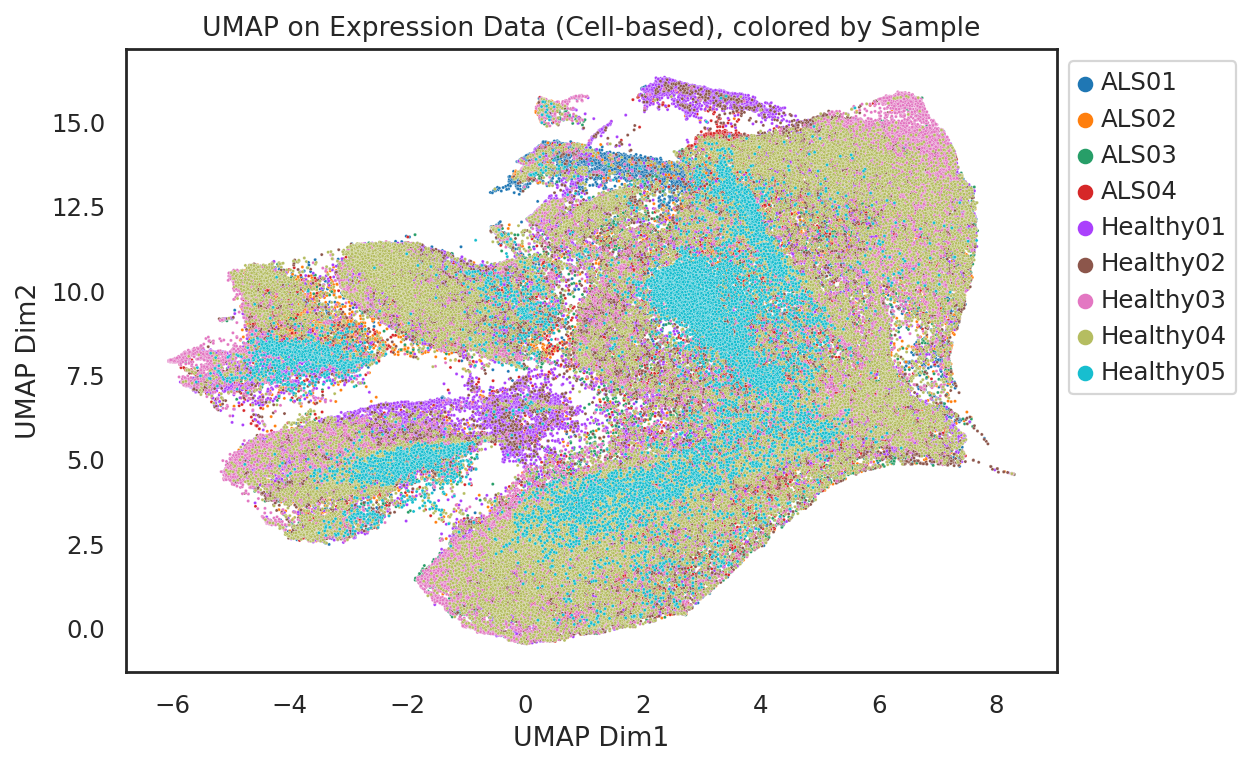

In [23]:
plt.figure(figsize=(8,5))
sns.set_theme(style="white", palette=None)
sns.scatterplot(res_df, x="UMAP Dim1", y="UMAP Dim2", hue="Sample", s=2)
plt.title("UMAP on Expression Data (Cell-based), colored by Sample")
#plt.legend(loc="upper left")

plt.legend(bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.savefig("umap_samples.png")
#plt.show()

<Figure size 320x320 with 0 Axes>

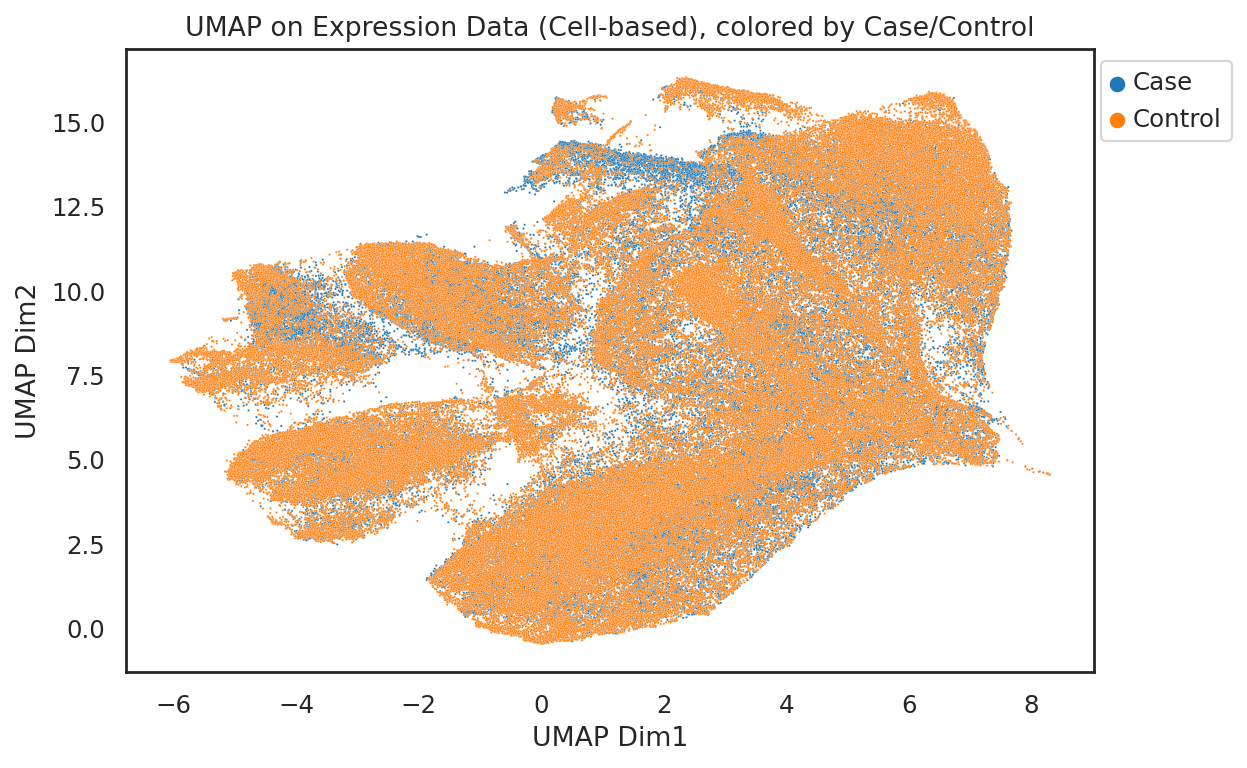

In [24]:
#reducer = umap.UMAP()
#embedding = reducer.fit_transform(Xs_normalized)
#res_df = ys.copy()
#res_df["UMAP Dim1"] = embedding[:,0]
#res_df["UMAP Dim2"] = embedding[:,1]
plt.clf()
plt.figure(figsize=(8,5))
sns.set_theme(style="white", palette=None)
sns.scatterplot(res_df, x="UMAP Dim1", y="UMAP Dim2", hue="Group", s=1)
plt.title("UMAP on Expression Data (Cell-based), colored by Case/Control")
#plt.legend(loc="upper left")

plt.legend(bbox_to_anchor=(1.155, 1))
plt.tight_layout()
plt.savefig("umap_condition.png")
#plt.show()

In [25]:
pca = PCA(2)
res = pca.fit_transform(Xs_normalized)
res_df = ys.copy()
res_df["PCA Dim1"] = res[:,0]
res_df["PCA Dim2"] = res[:,1]

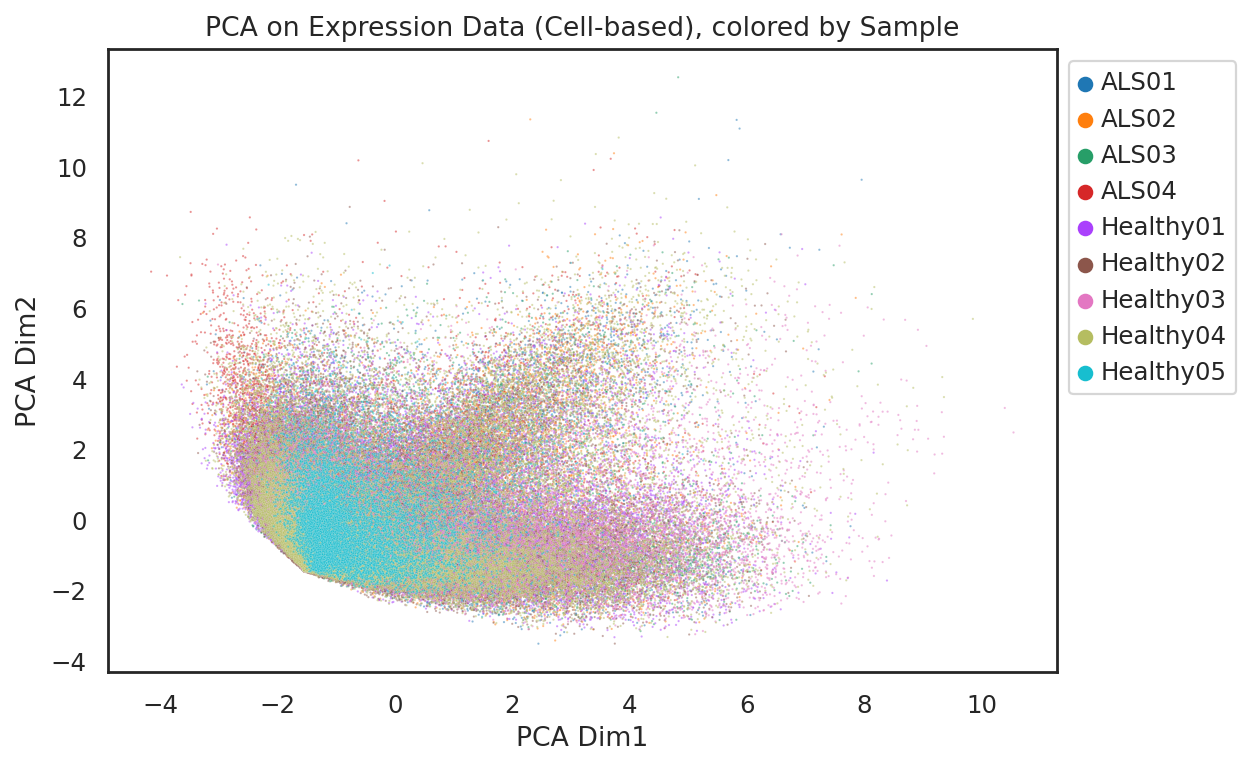

In [26]:
plt.figure(figsize=(8,5))
sns.set_theme(style="white", palette=None)
sns.scatterplot(res_df, x="PCA Dim1", y="PCA Dim2", hue="Sample", alpha=0.5, s=1)
plt.title("PCA on Expression Data (Cell-based), colored by Sample")
#plt.legend(loc="upper left")

plt.legend(bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.savefig("pca_samples.png")
#plt.show()

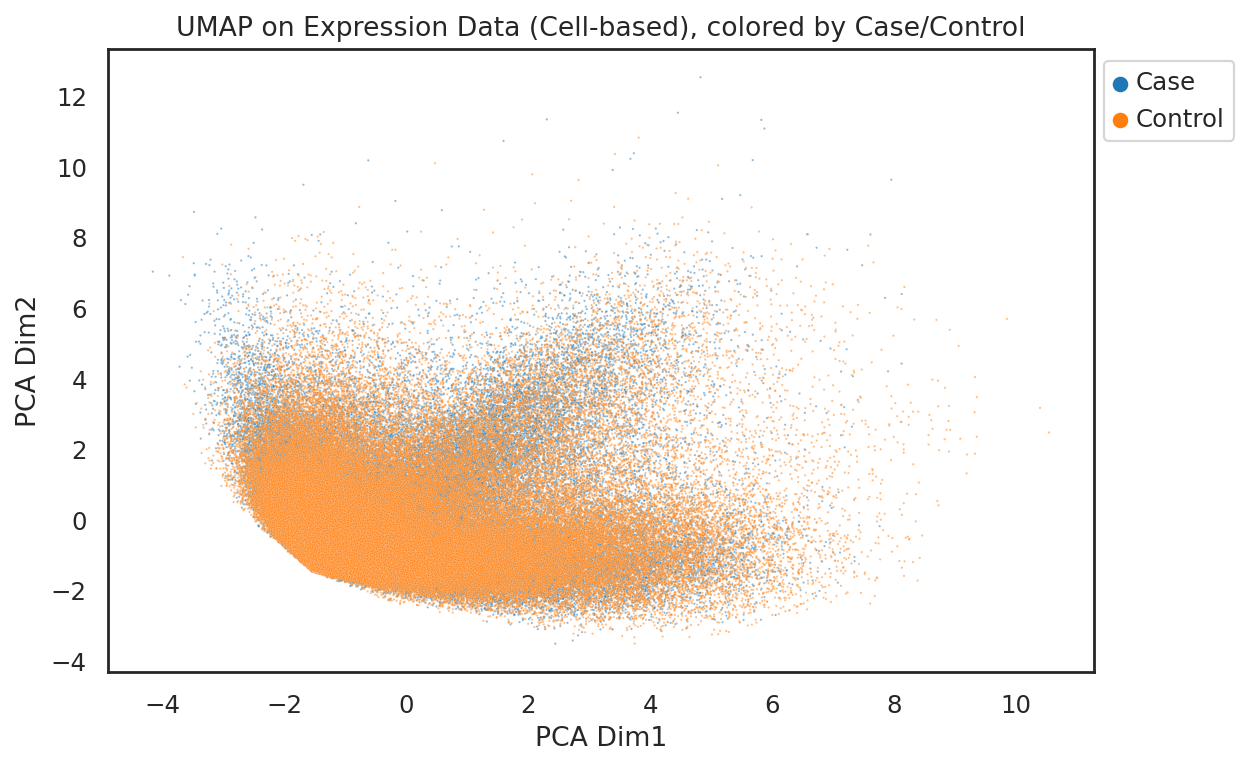

In [27]:
plt.figure(figsize=(8,5))
sns.set_theme(style="white", palette=None)
sns.scatterplot(res_df, x="PCA Dim1", y="PCA Dim2", hue="Group", alpha=0.5, s=1)
plt.title("UMAP on Expression Data (Cell-based), colored by Case/Control")
#plt.legend(loc="upper left")

plt.legend(bbox_to_anchor=(1.155, 1))

plt.tight_layout()
plt.savefig("pca_condition.png")
#plt.show()

In [ ]:
conf_heatmap(res_df, props1="8-Means Label", props2="Sample")